In [2]:
import CAENReader
import sys
# import ROOT
from array import array
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import seaborn as sns
import pandas as pd


In [3]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 22
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_689379/3970147.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [11]:
# infile_name = "190307-EJ309-1700V-SPE_2.dat"
infile_name = "../../configFiles/data_wAmp.dat"
df = CAENReader.DataFile(infile_name)
print('Processing file:', infile_name)

Processing file: ../../configFiles/data_wAmp.dat


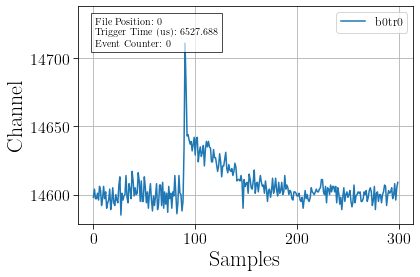

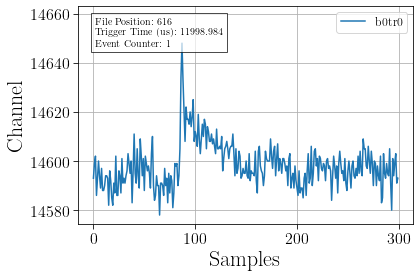

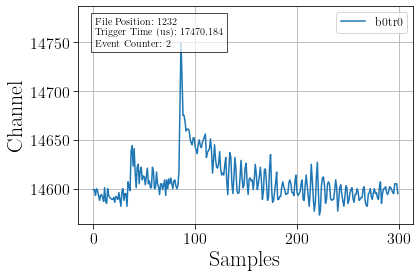

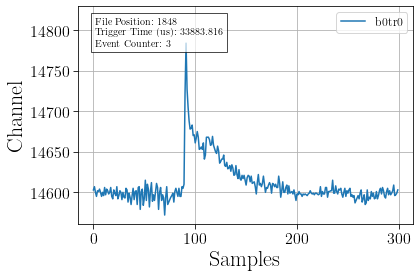

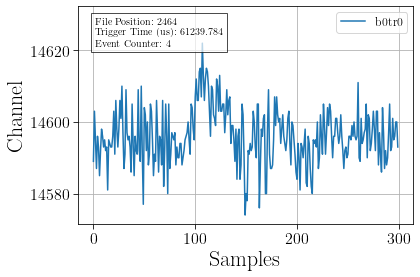

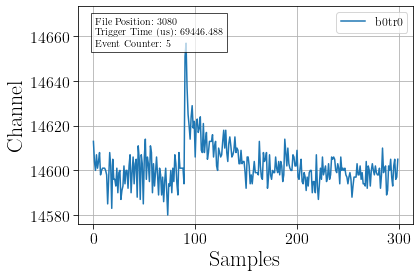

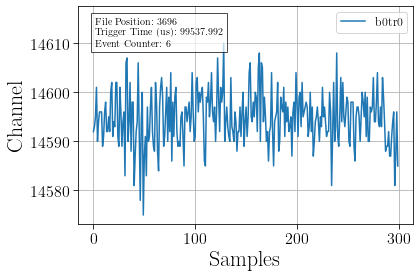

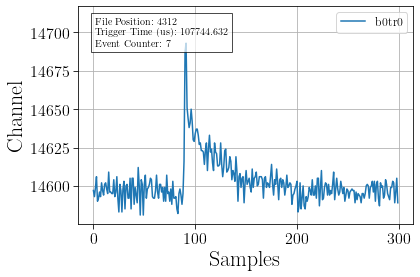

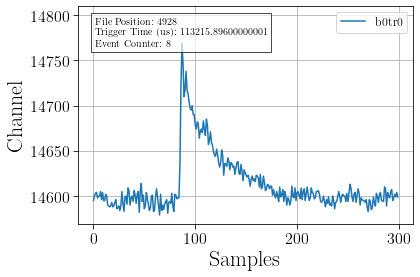

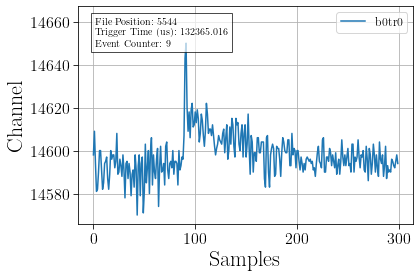

In [12]:
for i in range(0,10):
    tr = df.getNextTrigger()
#     if(i>85):
    tr.display()

(70.0, 125.0)

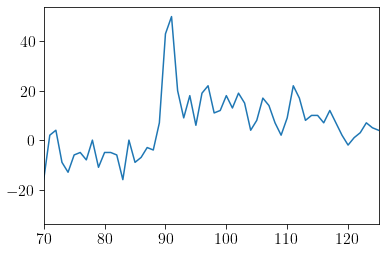

In [13]:
# plt.plot((tr.traces['b0tr0']))
plt.plot(tr.traces['b0tr0'].astype("float")-14600)

plt.xlim(70,125)

In [14]:
len(tr.traces['b0tr0'])

300

In [15]:
array = []
integ_ADC = []
df.file.seek(0)
while tr is not None:
# for i in range(0,50000):
    # Save waveform from specified channel ID
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))

#     event_ID[0] = tr.eventCounter
#     trg_time[0] = int(round(tr.triggerTime * 1000)) # In ns
    bsl = np.mean(trace[0:20])
#     bsl = 0
    for i in range(len(trace)):
        array_trace[i] = (trace[i]-bsl)
#     array.append(array_trace)
    integ_ADC.append(sum(array_trace[80:150]))
    tr = df.getNextTrigger()


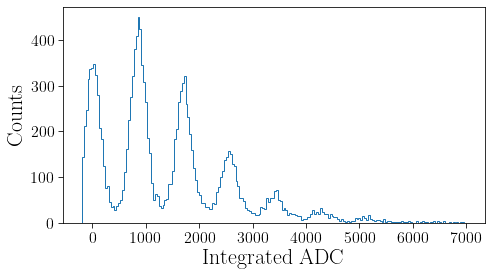

In [16]:
plt.figure(figsize=(7,4))
plt.hist(integ_ADC, bins = 200, histtype="step", range = (-200,7000), lw = 1);
# plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Integrated ADC')
# plt.xscale('log')
# plt.title("Berkeley MV, 40 min bkg run")
plt.tight_layout()
# plt.savefig("./plots/PMT_MV_40min_bkgRun.pdf")



In [17]:
len(integ_ADC)

14766

In [10]:
df = pd.DataFrame(integ_ADC, columns = ['integ_ADC'])


In [11]:
df.to_pickle("./test.pkl")

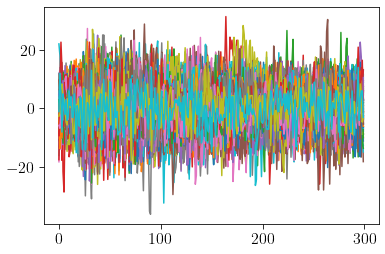

In [78]:
for i in range(0,200):
    # Save waveform from specified channel ID
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for i in range(len(trace)):
        array_trace[i] = (trace[i]-bsl)
#     array.append(array_trace)
    plt.plot(array_trace)
    tr = df.getNextTrigger()

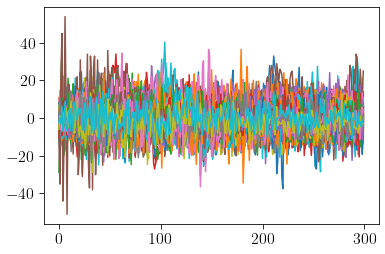

In [79]:
for i in range(0,200):
    # Save waveform from specified channel ID
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for i in range(len(trace)):
        array_trace[i] = (trace[i]-bsl)
    plt.plot(array_trace)
    tr = df.getNextTrigger()

In [80]:
wf_array = []
# for i in range(0,200):
while tr is not None:
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for j in range(len(trace)):
        array_trace[j] = (trace[j]-bsl)
    wf_array.append(array_trace)
    tr = df.getNextTrigger()

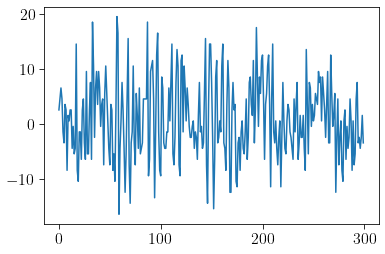

In [81]:
plt.plot(wf_array[3])

## Define needed variables for FFT

In [82]:
sampling_rate = 500E6 #Smp/s
sample_length = 1/sampling_rate #s

In [83]:
from scipy import fft
import scipy
def spectrum(values):
    """The FFT complex spectrum values of the signal."""
    return scipy.fft.rfft(values)

def frequencies(values, dt):
    """The FFT frequencies of the signal."""
    return scipy.fft.rfftfreq(n=len(values), d=dt)

In [84]:
spectrum_array = []
freq_array = []
for i in range(0,len(wf_array)):
    spectrum_array.append(abs(spectrum(wf_array[i])))
    freq_array.append(frequencies(wf_array[i],sample_length))
#     plt.plot(frequencies(wf_array[i],sample_length),abs(spectrum(wf_array[i])))
# plt.xlabel("Freq [MHz]")
# plt.yscale('log')
spectrum_array = np.array(spectrum_array)

In [ ]:
plt.figure(figsize=(7,6))

# np.mean(spectrum_array, axis=0)
# spectrum_array = []
for i in range(0,100):
    plt.plot(frequencies(wf_array[i],sample_length)/1E6,abs(spectrum(wf_array[i])))
plt.plot(frequencies(wf_array[0],sample_length)/1E6,np.mean(spectrum_array, axis=0), c = "black", ls = "--", lw = 3)
plt.xlabel("Freq [MHz]")
plt.yscale('log')
# plt.plot(frequencies(wf_array[0],sample_length),np.mean(spectrum_array, axis=0))

In [86]:
spectrum_flat_list = [item for sublist in spectrum_array for item in sublist]
freq_flat_list = [item for sublist in freq_array for item in sublist]

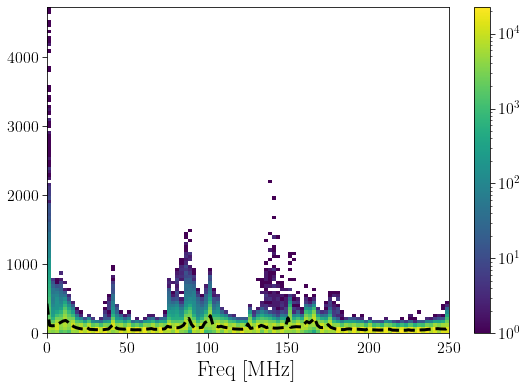

In [87]:
plt.figure(figsize=(9,6))

plt.hist2d(np.array(freq_flat_list)/1E6, spectrum_flat_list, bins = 100, norm=mpl.colors.LogNorm());
plt.plot(frequencies(wf_array[0],sample_length)/1E6,np.mean(spectrum_array, axis=0), c = "black", ls = "--", lw = 3,)

plt.xlabel("Freq [MHz]")
plt.colorbar()
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1E-2, 2500)